In [ ]:
USER  = 'adrian'
STAGE = 1
MODEL = 2

In [ ]:
PATH_TO_RESEULTS = f"../results/{USER}/stage-{STAGE}/model-{MODEL}"

In [ ]:
import pandas as pd
import pdb
import os

In [ ]:
# !pip install git+https://github.com/quantopian/pyfolio
# import again if first time not work
import pyfolio

/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


In [ ]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline

In [ ]:
def backtest_strat(df):
    strategy_ret= df.copy()
    strategy_ret['Date'] = pd.to_datetime(strategy_ret['Date'], errors='coerce')
    strategy_ret.set_index('Date', drop = False, inplace = True)
    # strategy_ret.index = strategy_ret.index.tz_localize('UTC')
    del strategy_ret['Date']
    ts = pd.Series(strategy_ret['daily_return'].values, index=strategy_ret.index)

    return ts

In [ ]:
def plot_backtesting(data_type='validation'):
    df_stocks = pd.read_csv(os.path.join(PATH_TO_RESEULTS, f'df_stocks_{data_type}.csv'))
    df_account_value = pd.read_csv(os.path.join(PATH_TO_RESEULTS, f'df_account_value_{data_type}.csv'))

    stocks_strat = backtest_strat(df_stocks)
    account_value_strat = backtest_strat(df_account_value)

    with pyfolio.plotting.plotting_context(font_scale=1.1):
        pyfolio.create_full_tear_sheet(returns=account_value_strat,
                                    benchmark_rets=stocks_strat, set_context=False)

# Validation

/usr/local/lib/python3.7/dist-packages/empyrical/stats.py:1528: RuntimeWarning: divide by zero encountered in double_scalars
  np.abs(np.percentile(returns, 5))


Start date,2020-11-04
End date,2021-11-03
Total months,12
,Backtest
Annual return,140.663%
Cumulative returns,140.663%
Annual volatility,8.838%
Sharpe ratio,10.04
Calmar ratio,29.98
Stability,0.91
Max drawdown,-4.691%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,4.69,2021-03-24,2021-04-14,2021-04-27,25
1,NaN,NaT,NaT,NaT,NaN
2,NaN,NaT,NaT,NaT,NaN
3,NaN,NaT,NaT,NaT,NaN
4,NaN,NaT,NaT,NaT,NaN


Stress Events,mean,min,max
New Normal,0.35%,-1.27%,1.77%


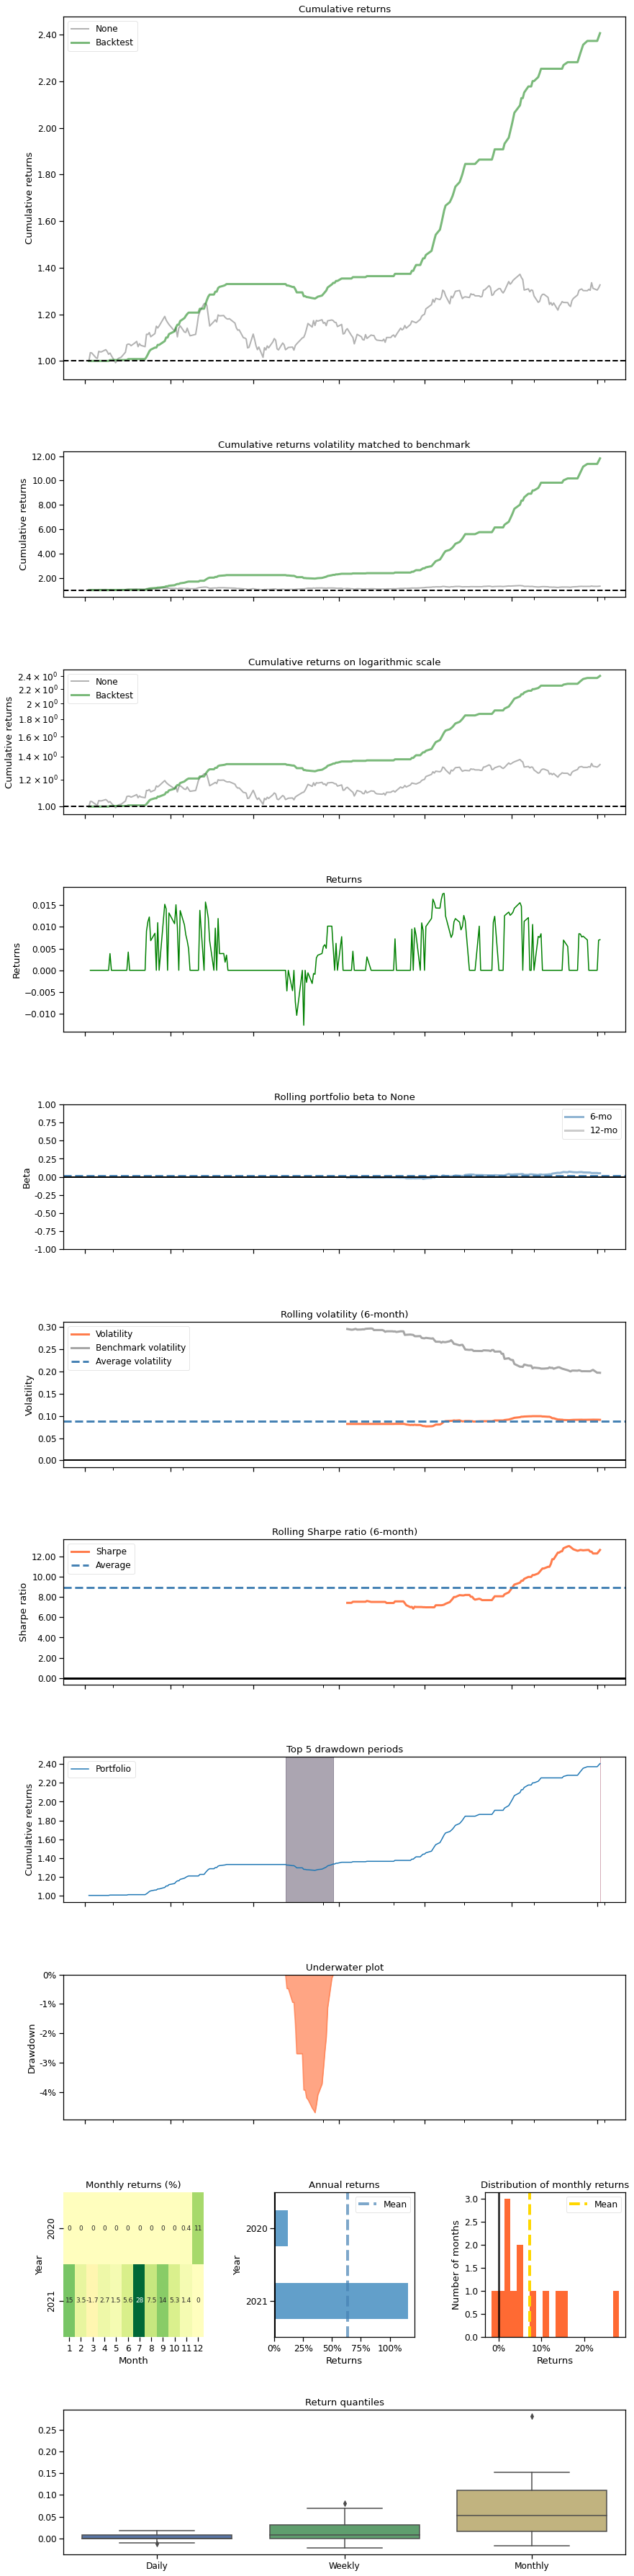

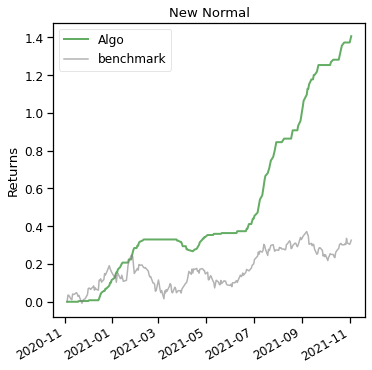

In [ ]:
plot_backtesting(data_type='validation')

# Test

Start date,2021-11-04
End date,2022-05-05
Total months,6
,Backtest
Annual return,48.613%
Cumulative returns,21.907%
Annual volatility,7.372%
Sharpe ratio,5.46
Calmar ratio,17.70
Stability,0.58
Max drawdown,-2.747%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,2.75,2022-01-06,2022-03-17,2022-03-24,56
1,0.99,2022-04-05,2022-04-11,NaT,NaN
2,0.12,2021-12-17,2021-12-20,2021-12-22,4
3,0.08,2022-03-30,2022-03-31,2022-04-01,3
4,NaN,NaT,NaT,NaT,NaN


Stress Events,mean,min,max
New Normal,0.16%,-0.84%,1.67%


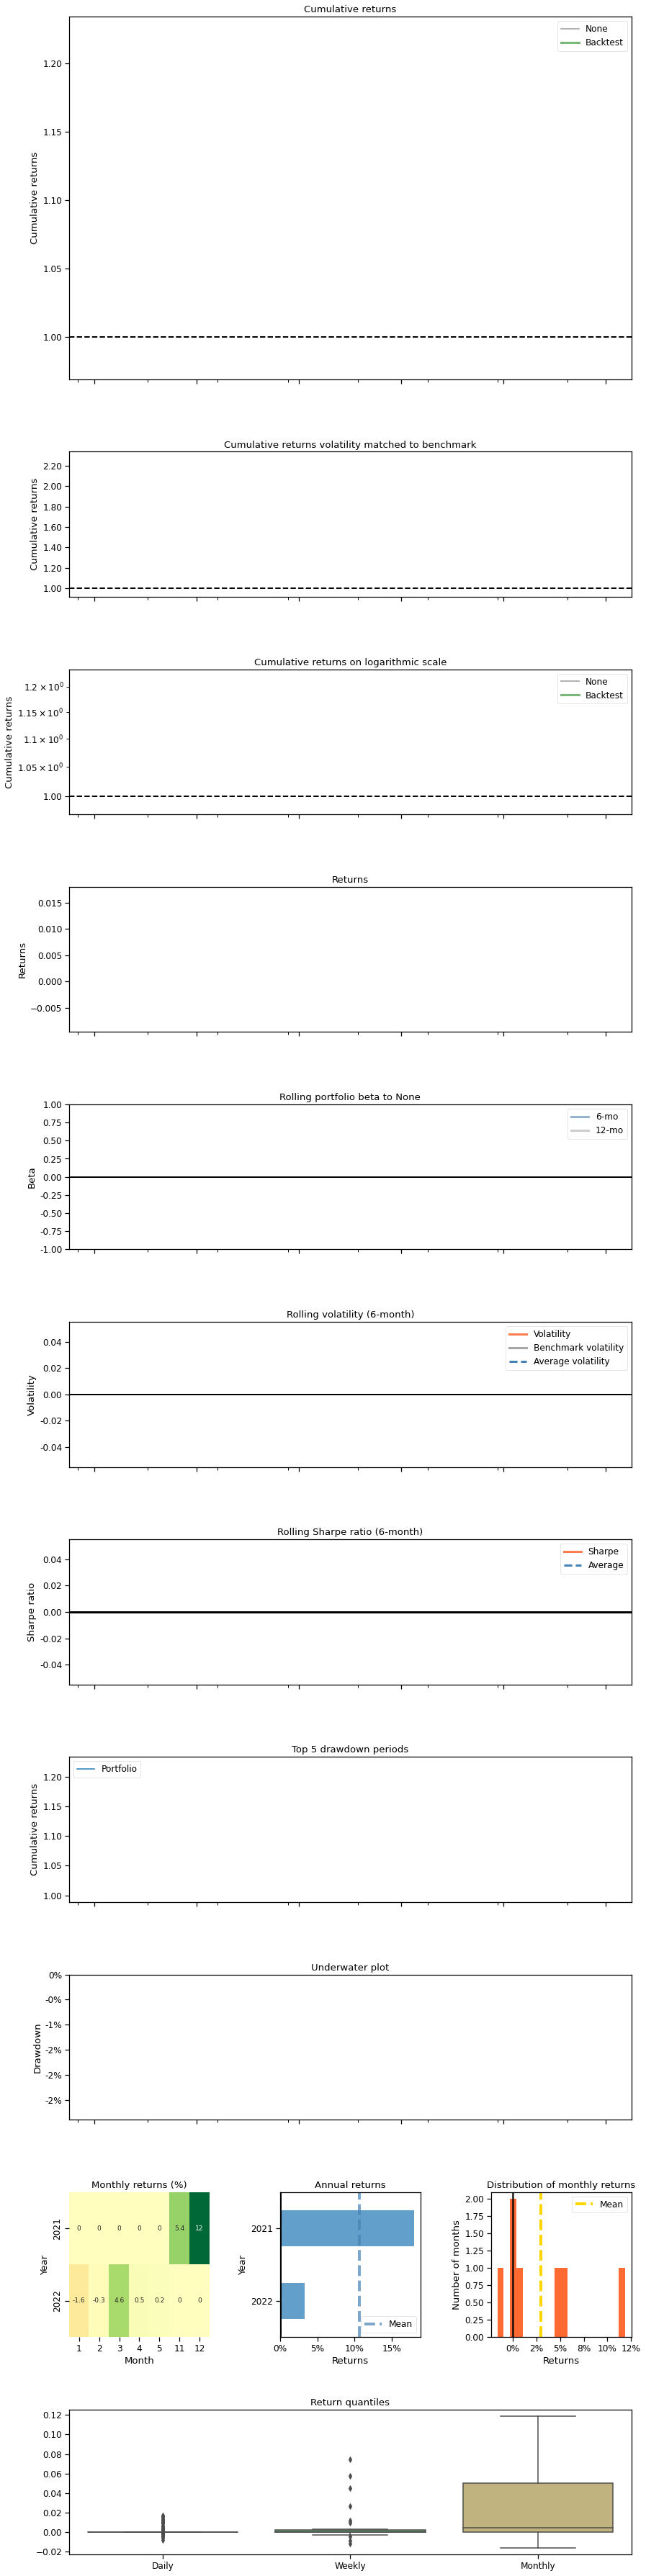

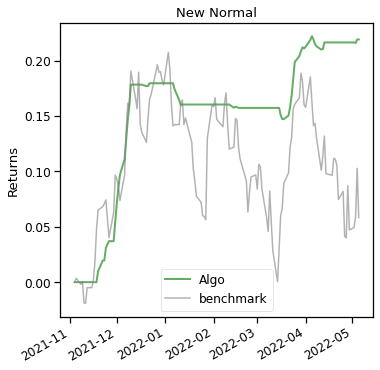

In [ ]:
plot_backtesting(data_type='test')